<a href="https://colab.research.google.com/github/DanyPao/DataScience2/blob/main/Entrega_Final_Daniela_Esposito_Smoker_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto: Smoker Status Prediction**

Data Science II ~ Primera pre-entrega


##Datos:

####Alumna: Daniela Paola Espósito
####Comisión: 61145
####Docente: David Silvera
####Tutora: María Soledad Gutiérrez


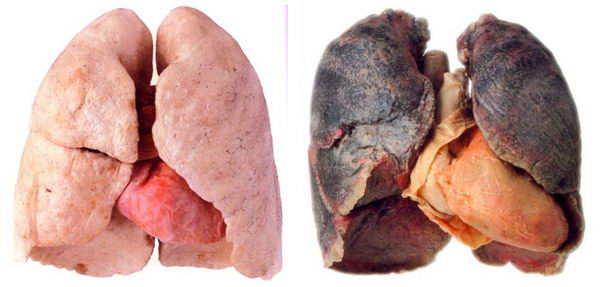

##Introducción:
#####Según la Organización Mundial de la Salud (OMS), el tabaco es la primera causa evitable de enfermedad, invalidez y muerte prematura en el mundo.
#####El tabaquismo es la causa de...


- Más del 90% de los casos de bronquitis.
- Del 95% de los casos de cáncer de pulmón.
- Del 30% de todas las cardiopatías coronarias.
- Parte importante de los casos de cáncer de esófago, vejiga urinaria, cavidad bucal y laringe.(1)

#####Por todo lo anterior, es de gran importancia poder detectar si una persona es fumadora o no, a través de estudios de rutina.

#####Muchas veces por diversas razones, los pacientes no son sinceros o entran en una emergencia sin posibilidad de preguntarles si fuma o no, ya que están inconcientes, como en un accidente de tránsito, y por lo tanto, cuando el médico no tiene los datos justos, no puede diagnosticar correctamente o puede suministrar medicamentos que serían contraproducentes, como por ejemplo, por lo que afecta el ser fumador al corazón.

#####Si con este modelo se logra predicir el tabaquismo de una persona, no importará si se sabe o no, si esa persona fuma, para que el medico pueda diagnosticar eficazmente.

###Objetivo

El objetivo de este proyecto es poder si crear un modelo que pueda predecir el estado de tabaquismo de un individuo utilizando bioseñales. (Problema de Clasificación: "Fuma", "NO Fuma")

###Público objetivo

El público objetivo en este caso es el médico que va a tratar al paciente, sea que éste pueda decir si es fumador o no.

###Hipótesis

Un modelo de aprendizaje automático será capaz de clasificar con precisión las instancias en diferentes categorías basadas en los siguientes atributos:

- "Fuma"

- "No Fuma"

###Preguntas:

- ¿Qué marcadores biológicos están relacionados con el tabaquismo?
- ¿Hay alguna bioseñal que por si sola pueda indicar si es fumador?
- ¿Qué indicadores combinados pueden predecir si padece tabaquismo?


##EDA y Data Wrangling

###Librerías

In [1]:
#data handling and preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Visualization
from matplotlib import colors
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install dataprep
from dataprep.eda import create_report

# Model selection and evaluation
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, HalvingGridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

# Classification models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Miscellaneous
import pickle
import os
import joblib
import warnings
warnings.filterwarnings('ignore')

cmap=colors.ListedColormap('RdBu_r')


###Carga de datos

In [2]:
url = 'https://raw.githubusercontent.com/DanyPao/DataScience2/main/train_dataset.csv'
df = pd.read_csv(url)

In [3]:
df.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   35         170          85       97.0             0.9              0.9   
1   20         175         110      110.0             0.7              0.9   
2   45         155          65       86.0             0.9              0.9   
3   45         165          80       94.0             0.8              0.7   
4   20         165          60       81.0             1.5              0.1   

   hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
0              1               1       118          78  ...   70  142   
1              1               1       119          79  ...   71  114   
2              1               1       110          80  ...   57  112   
3              1               1       158          88  ...   46   91   
4              1               1       109          64  ...   47   92   

   hemoglobin  Urine protein  serum creatinine   AST   ALT  Gtp  \
0        19.8              1               1.0    61   115  125   
1        15.9              1               1.1    19    25   30   
2        13.7              3               0.6  1090  1400  276   
3        16.9              1               0.9    32    36   36   
4        14.9              1               1.2    26    28   15   

   dental caries  smoking  
0              1        1  
1              1        0  
2              0        0  
3              0        0  
4              0        0  

[5 rows x 23 columns]

###Normalización

######Traducción de variables

In [4]:
df=df.rename(columns={'age':'edad','height(cm)':'altura','weight(kg)':'peso','waist(cm)':'cintura','eyesight(left)':'vista_izq','eyesight(right)':'vista_der','hearing(left)':'audicion_izq','hearing(right)':'audicion_der','systolic':'sistolica','relaxation':'diastolica','fasting blood sugar':'glucosa','Cholesterol':'colesterol','triglyceride':'trigliceridos','hemoglobin':'hemoglobina','Urine protein':'proteina_orina','serum creatinine':'creatinina','dental caries':'caries_dental','smoking':'fumador'})

In [5]:
df.columns

Index(['edad', 'altura', 'peso', 'cintura', 'vista_izq', 'vista_der',
       'audicion_izq', 'audicion_der', 'sistolica', 'diastolica', 'glucosa',
       'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
       'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp', 'caries_dental',
       'fumador'],
      dtype='object')

###Descripción de Variables

Valores normales entre paréntesis.(2) (3) (4)

edad: edad del paciente (años)

altura: altura del paciente (cm)

peso: peso corporal (kg)

cintura: longitud de la circunsferencia de la cintura (cm)

vista_izq: visión del ojo izquierdo ('0' a '10', con '0' como visión perfecta y '10' como ceguedad total)

vista_der: visión del ojo derecho ('0' a '10', con '0' como visión perfecta y '10' como ceguedad total)

audicion_izq: audición oído izquierdo ('1' y '2', con '1'como 'oye' y '2' como 'no oye')

audicion_der: audición oído derecho ('1' y '2', con '1'como 'oye' y '2' como 'no oye')

sistolica: presión arterial sitólica. (menor a 120)

diastolica: presión arterial diástolica. (mayor a 80)

glucosa: azúcar en sangre en ayunas. (70-105 mg/dL)

colesterol: nivel de colesterol total. (150-199 mg/dL)

trigliceridos: nivel de triglicéridos. (Normales: < 150 mg/dL, Límites: 150–199 mg/dL, Altos: 200–499 mg/dL, Muy altos: ≥ 500 mg/dL)

HDL: nivel de colesterol HDL (lipoproteína de alta densidad) en la sangre, a veces llamado colesterol 'bueno'. (≥ 40 mg/dL)

LDL: nivel de colesterol LDL (lipoproteína de baja densidad) en la sangre, a veces llamado colesterol 'malo'. (≤ 130 mg/dL)

hemoglobina: nivel de hemoglobina en sangre. (12-16 g/dL en mujeres, 14-17 g/dL en hombres)

proteina_orina: nivel de proteína en orina. (< 100 mg/24 h)

creatinina: nivel de creatinina en sangre. (Hombres: 0,7–1,2 mg/dL, Mujeres: 0,5–1,0 mg/dL)

AST: nivel de la enzima AST (transaminasa glutámico oxalacética) en la sangre. (< 35 U/L)

ALT: nivel de la enzima ALT (transaminasa glutámico pirúvica) en la sangre. (< 35 U/L)

Gtp: nivel de enzima GTP (gamma-glutamil transferasa) en la sangre. (Varón adulto: 8–61 U/L, Mujer adulta: 5–36 U/L)

caries_dental: condición de caries dental ('0' y '1', '0' sin caries y '1' con caries)

fumador: si es fumador o no ('0' y '1', '0' no fumador y '1' fumador)

###Estadística descriptiva

 - El dataset contiene 23 columnas y 38984 filas.
 - Todas las variables son numéricas, de las cuales, la mayoría son números enteros.
 - Este dataset no contiene datos faltantes.
 - Por lo que se aprecia a simple vista en el 'describe', muchas de la variables deben tener outliers; ya que, por ejemplo, en la presión arterial sistólica, el maximo valor es 233, el cual es un valor completamente anormal, que incluso esa persona podría estar por tener un infarto en ese momento ya que es un valor extremadamente alto. Este tema será ampliado en la sección destinada a outliers.
 - La variable objetivo se encuentra desbalanceada, con 36,72% de fumadores y 63,27% de no fumadores.
 - Hay 5517 filas duplicadas, que no voy a eliminar porque al ser los datos redondeados a enteros (en su mayoría), la repetición de datos es real y no una duplicación de registros. O sea, la mayor frecuencia de esos datos debe ser tomada en cuenta.
 - No hay ninguna variable de tiempo (tipo datatime), pero no es necesaria para este análisis.


In [6]:
df.describe().T

count        mean        std    min    25%    50%    75%  \
edad            38984.0   44.127591  12.063564   20.0   40.0   40.0   55.0   
altura          38984.0  164.689488   9.187507  130.0  160.0  165.0  170.0   
peso            38984.0   65.938718  12.896581   30.0   55.0   65.0   75.0   
cintura         38984.0   82.062115   9.326798   51.0   76.0   82.0   88.0   
vista_izq       38984.0    1.014955   0.498527    0.1    0.8    1.0    1.2   
vista_der       38984.0    1.008768   0.493813    0.1    0.8    1.0    1.2   
audicion_izq    38984.0    1.025369   0.157246    1.0    1.0    1.0    1.0   
audicion_der    38984.0    1.026190   0.159703    1.0    1.0    1.0    1.0   
sistolica       38984.0  121.475631  13.643521   71.0  112.0  120.0  130.0   
diastolica      38984.0   75.994408   9.658734   40.0   70.0   76.0   82.0   
glucosa         38984.0   99.342269  20.642741   46.0   89.0   96.0  104.0   
colesterol      38984.0  196.883491  36.353945   55.0  172.0  195.0  219.0   
trigliceridos   38984.0  126.749461  71.803143    8.0   74.0  108.0  160.0   
HDL             38984.0   57.293146  14.617822    4.0   47.0   55.0   66.0   
LDL             38984.0  115.081495  42.883163    1.0   91.0  113.0  136.0   
hemoglobina     38984.0   14.624264   1.566528    4.9   13.6   14.8   15.8   
proteina_orina  38984.0    1.086523   0.402107    1.0    1.0    1.0    1.0   
creatinina      38984.0    0.886030   0.220621    0.1    0.8    0.9    1.0   
AST             38984.0   26.198235  19.175595    6.0   19.0   23.0   29.0   
ALT             38984.0   27.145188  31.309945    1.0   15.0   21.0   31.0   
Gtp             38984.0   39.905038  49.693843    2.0   17.0   26.0   44.0   
caries_dental   38984.0    0.214421   0.410426    0.0    0.0    0.0    0.0   
fumador         38984.0    0.367279   0.482070    0.0    0.0    0.0    1.0   

                   max  
edad              85.0  
altura           190.0  
peso             135.0  
cintura          129.0  
vista_izq          9.9  
vista_der          9.9  
audicion_izq       2.0  
audicion_der       2.0  
sistolica        233.0  
diastolica       146.0  
glucosa          423.0  
colesterol       445.0  
trigliceridos    999.0  
HDL              359.0  
LDL             1860.0  
hemoglobina       21.1  
proteina_orina     6.0  
creatinina        11.6  
AST             1090.0  
ALT             2914.0  
Gtp              999.0  
caries_dental      1.0  
fumador            1.0

In [7]:
df.info()
#No voy a precisar encodear ya que todas las variables son numericas de origen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   edad            38984 non-null  int64  
 1   altura          38984 non-null  int64  
 2   peso            38984 non-null  int64  
 3   cintura         38984 non-null  float64
 4   vista_izq       38984 non-null  float64
 5   vista_der       38984 non-null  float64
 6   audicion_izq    38984 non-null  int64  
 7   audicion_der    38984 non-null  int64  
 8   sistolica       38984 non-null  int64  
 9   diastolica      38984 non-null  int64  
 10  glucosa         38984 non-null  int64  
 11  colesterol      38984 non-null  int64  
 12  trigliceridos   38984 non-null  int64  
 13  HDL             38984 non-null  int64  
 14  LDL             38984 non-null  int64  
 15  hemoglobina     38984 non-null  float64
 16  proteina_orina  38984 non-null  int64  
 17  creatinina      38984 non-null 

In [8]:
df['fumador'].value_counts()

0    24666
1    14318
Name: fumador, dtype: int64

In [9]:
df['fumador'].value_counts(normalize=True) * 100

0    63.272112
1    36.727888
Name: fumador, dtype: float64

In [10]:
df.shape

(38984, 23)

In [11]:
df.columns

Index(['edad', 'altura', 'peso', 'cintura', 'vista_izq', 'vista_der',
       'audicion_izq', 'audicion_der', 'sistolica', 'diastolica', 'glucosa',
       'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
       'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp', 'caries_dental',
       'fumador'],
      dtype='object')

In [12]:
cantNaN= pd.DataFrame({'Cantidad':df.isna().sum(),'Porcentaje':(df.isna().sum())/(df.shape[0])*(100)})
cantNaN

Cantidad  Porcentaje
edad                   0         0.0
altura                 0         0.0
peso                   0         0.0
cintura                0         0.0
vista_izq              0         0.0
vista_der              0         0.0
audicion_izq           0         0.0
audicion_der           0         0.0
sistolica              0         0.0
diastolica             0         0.0
glucosa                0         0.0
colesterol             0         0.0
trigliceridos          0         0.0
HDL                    0         0.0
LDL                    0         0.0
hemoglobina            0         0.0
proteina_orina         0         0.0
creatinina             0         0.0
AST                    0         0.0
ALT                    0         0.0
Gtp                    0         0.0
caries_dental          0         0.0
fumador                0         0.0

In [13]:
df.duplicated().sum()

5517

###Cardinalidad

###### - En esta sección se puede visualizar la cardinalidad de las variables.

In [14]:
cardinalidad=pd.DataFrame({'Cantidad':df.nunique()})
cardinalidad

Cantidad
edad                  14
altura                13
peso                  22
cintura              545
vista_izq             19
vista_der             17
audicion_izq           2
audicion_der           2
sistolica            125
diastolica            94
glucosa              258
colesterol           279
trigliceridos        389
HDL                  122
LDL                  286
hemoglobina          143
proteina_orina         6
creatinina            34
AST                  195
ALT                  230
Gtp                  439
caries_dental          2
fumador                2

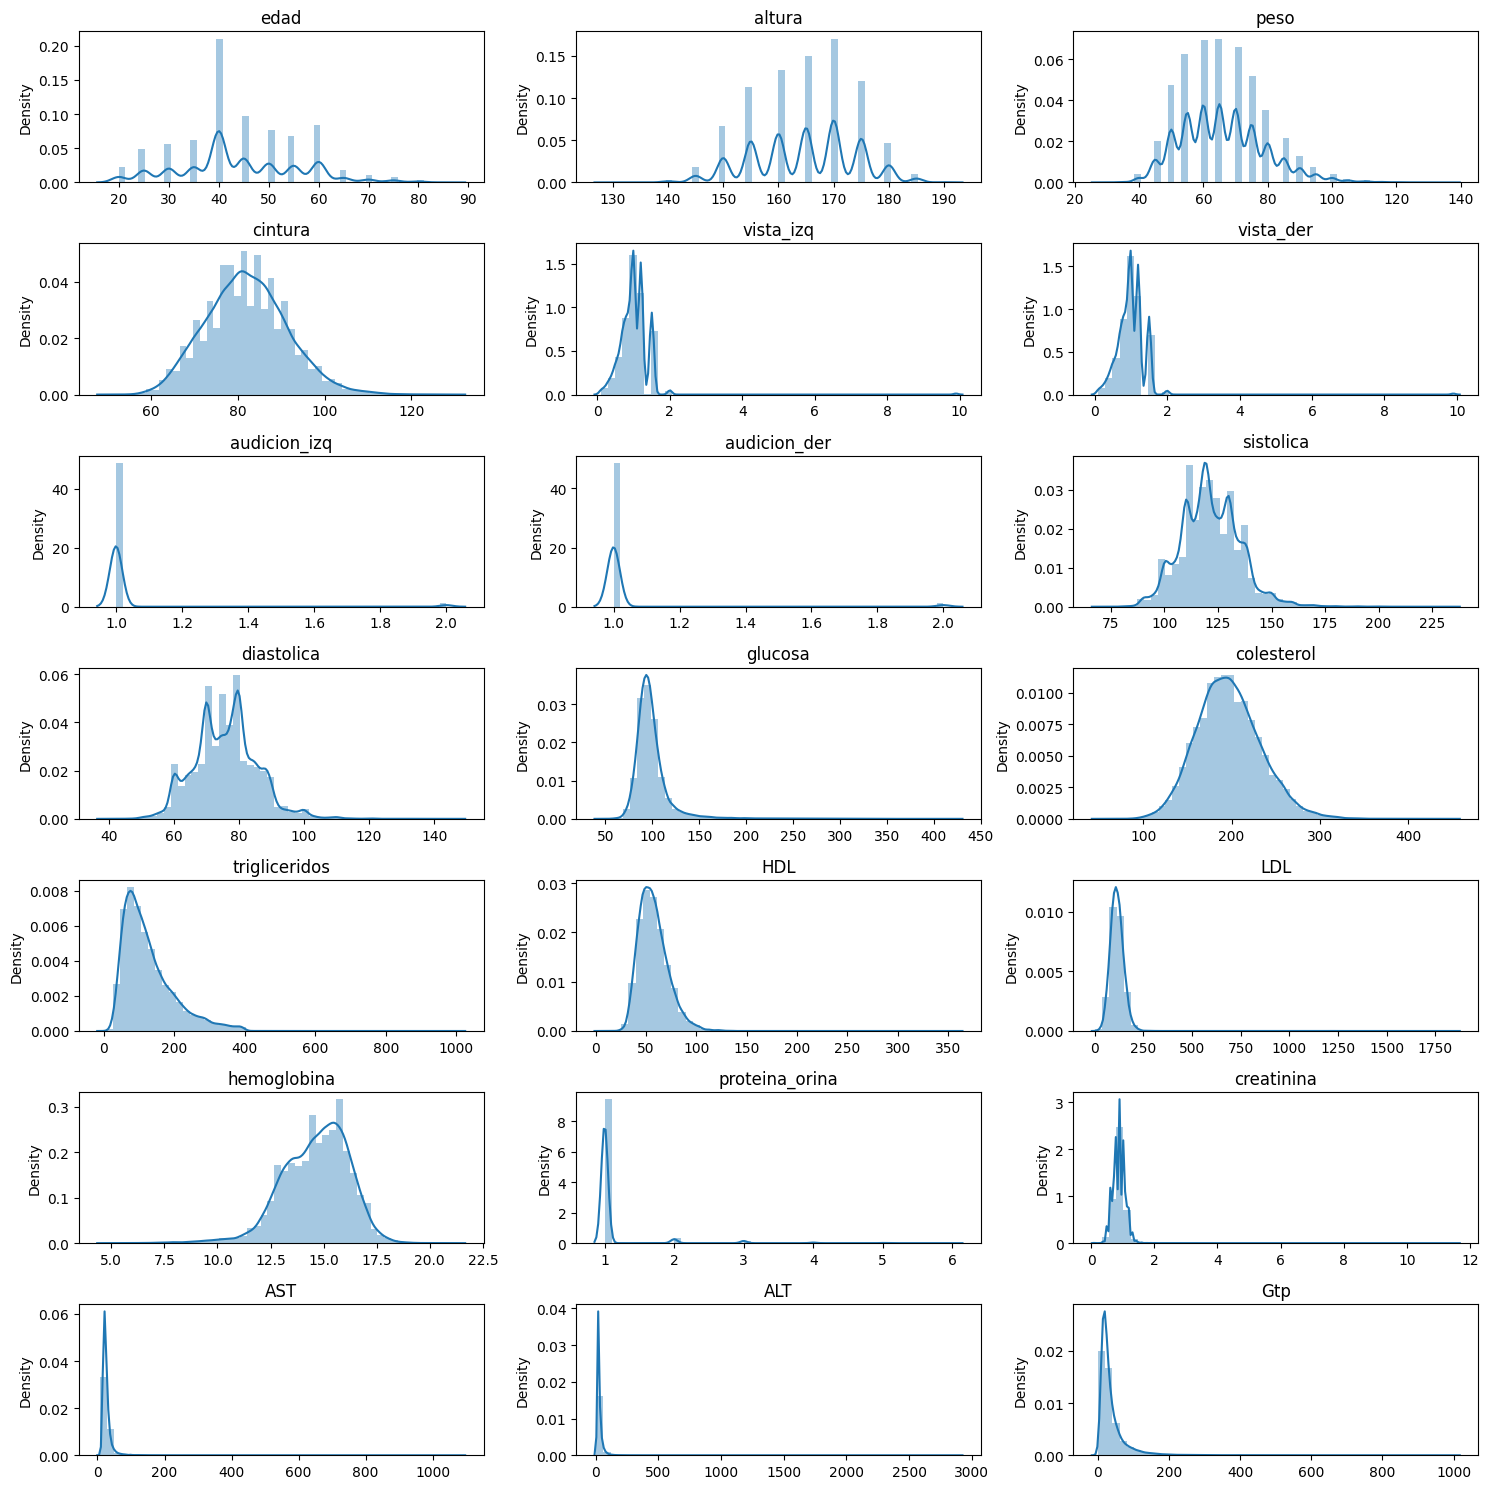

In [15]:
#df.hist(figsize=(16, 18), bins=40, xlabelsize=8, ylabelsize=8)

variables = ['edad', 'altura', 'peso', 'cintura', 'vista_izq', 'vista_der',
       'audicion_izq', 'audicion_der', 'sistolica', 'diastolica', 'glucosa',
       'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
       'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp']

columns = 3

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,15))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(df[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()


Las variables edad, altura, peso, cintura, sistólica, diastólica, glucosa,colesterol, HDL,LDL, hemoglobina y creatinina; parecen ser distribuciones normales pero por los outliers de éstas en algunas no se logra visualizar bien, como es el caso de las variables HDL, LDL y creatinina. Por lo que realizaré un análisis de Outliers y probablemente eliminaré algunos datos si éstos (unos pocos) son los culpables de outliers en muchas variables.


<Figure size 640x480 with 0 Axes>

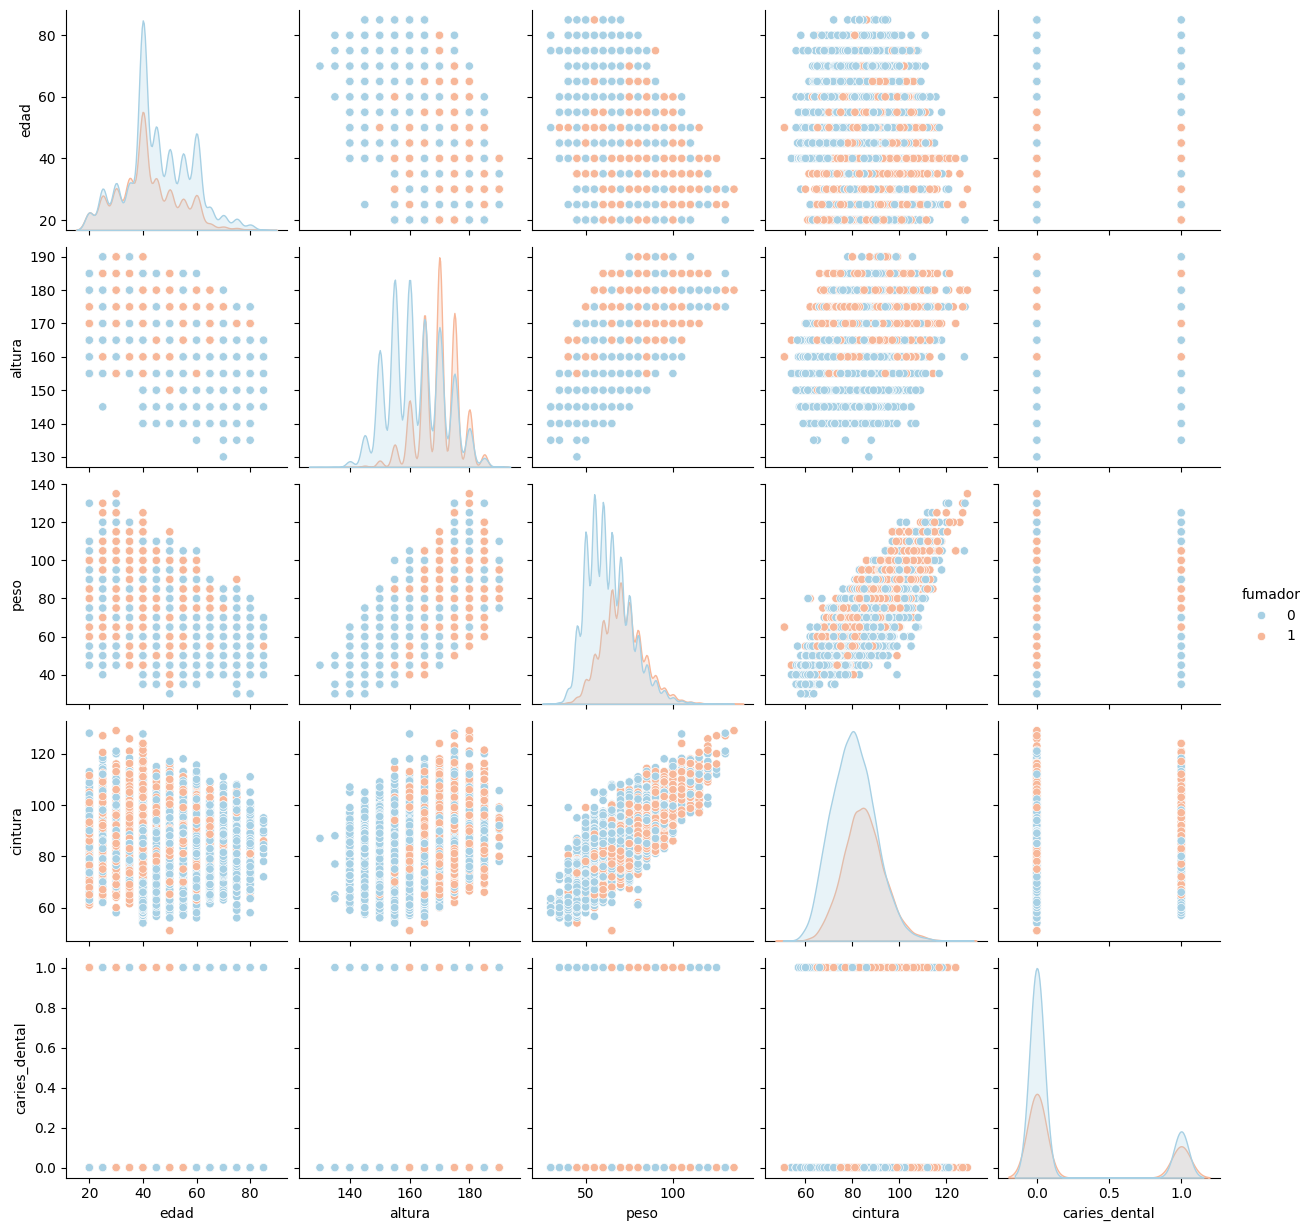

In [16]:
plotear=['edad', 'altura', 'peso', 'cintura', 'caries_dental','fumador']
      # , 'sistolica', 'diastolica', 'glucosa',
       #'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
     #  'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp'
plt.figure()
sns.pairplot(data=df[plotear],hue='fumador',palette='RdBu_r')
plt.show()

Relación directa entre altura y peso, peso y cintura; relación inversa debil entre altura y edad
Las distribuciones en algunos casos difieren en el caso de ser fumadores o no. Como en la altura, la tendencia central tiende a 1.70m para fumadores y a 1.62 para no fumadores. Tambien difieren en el caso del peso y la cintura, siendo una tendencia central de 55kg y 78cm aproximadamente para no fumadores y 70kg y 85cm para fumadores respectivamente.

###Outliers

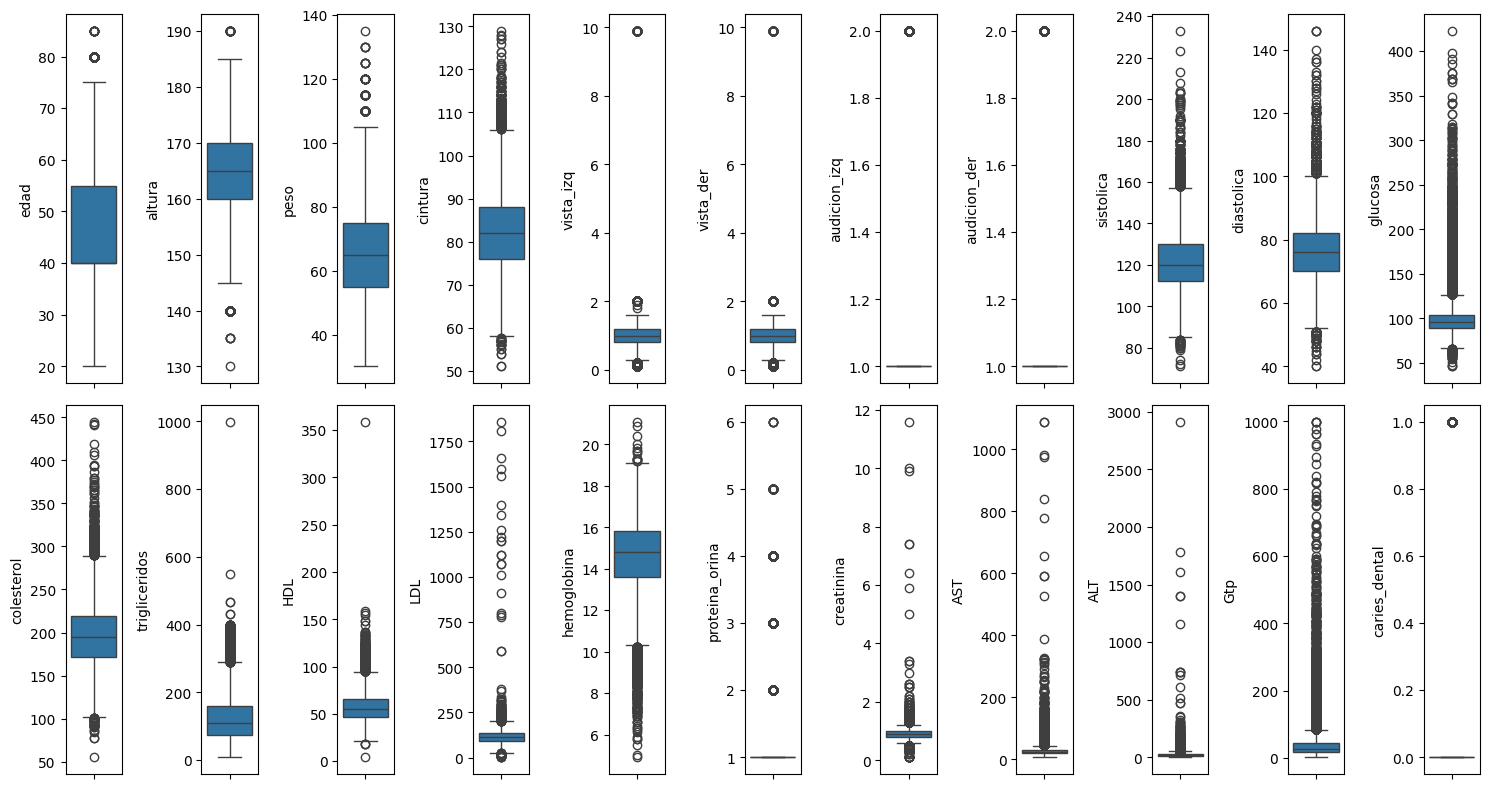

In [17]:
variables=['edad', 'altura', 'peso', 'cintura', 'vista_izq', 'vista_der',
       'audicion_izq', 'audicion_der', 'sistolica', 'diastolica', 'glucosa',
       'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
       'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp','caries_dental']

fig, axes = plt.subplots(2,11, figsize=(15,8))

for ax, variable in zip (axes.ravel(), variables):
  ax=sns.boxplot(y=variable,data=df,ax=ax)

plt.tight_layout()


Voy a eliminar outliers que son extremadamente fuera de los rangos "normales" como en el caso de los triglicéridos, los valores superiores a 500 mg/dl. En el caso de la edad, voy a eliminar a las personas mayores a 75 años, ya que considero que los datos de las personas de edad superior a esa, pueden estar sesgadas por la salud deteriorada por su ancianidad. Y en el caso del HDL, voy a eliminar los datos mayores a 250mg/dl.

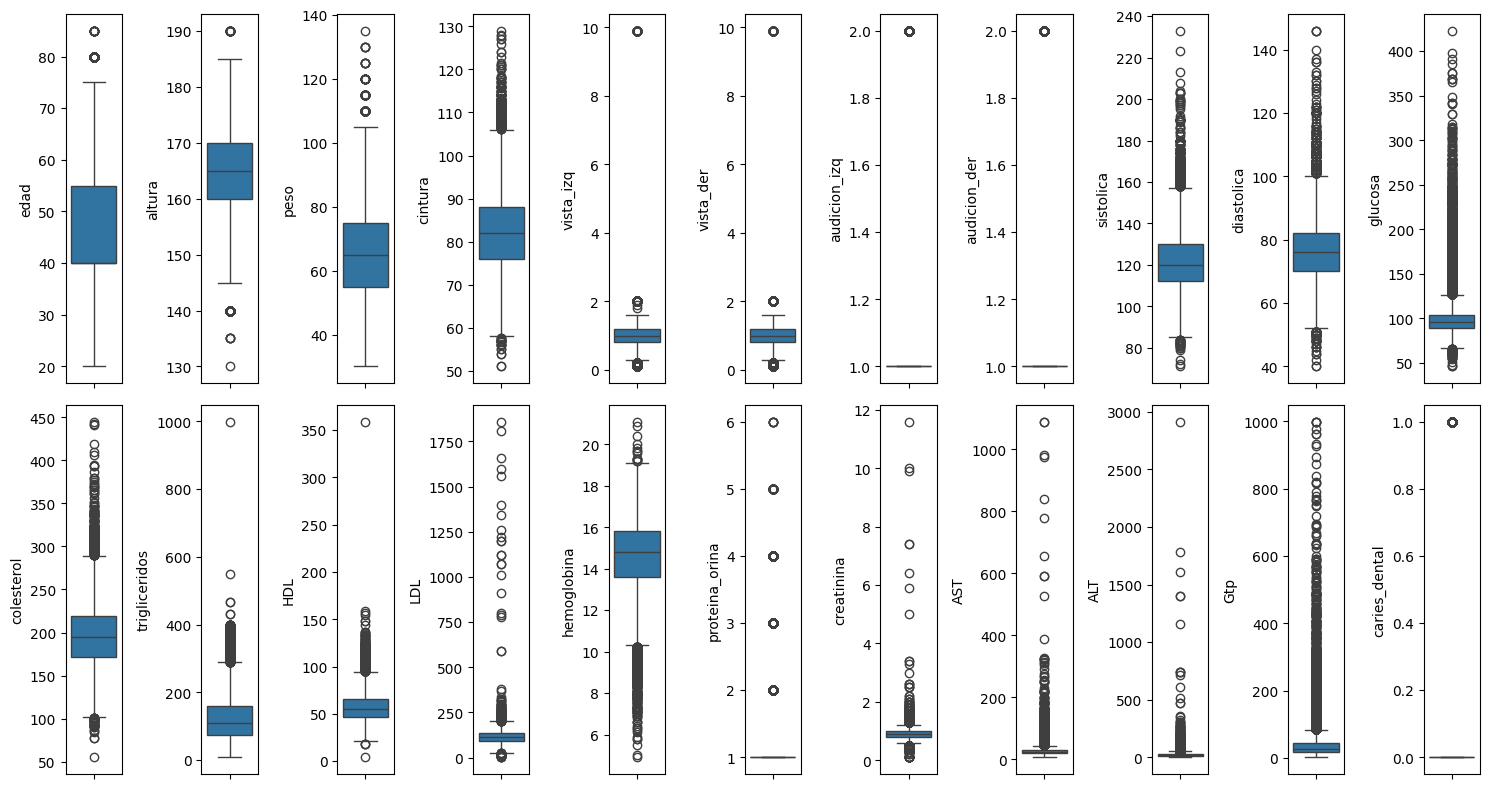

In [18]:
variables=['edad', 'altura', 'peso', 'cintura', 'vista_izq', 'vista_der',
       'audicion_izq', 'audicion_der', 'sistolica', 'diastolica', 'glucosa',
       'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
       'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp','caries_dental']

fig, axes = plt.subplots(2,11, figsize=(15,8))

for ax, variable in zip (axes.ravel(), variables):
  ax=sns.boxplot(y=variable,data=df,ax=ax)

plt.tight_layout()

###Correlación

In [19]:
corrmat=df.corr()


In [20]:
fig=px.imshow(corrmat,
              x=corrmat.columns,
              y=corrmat.columns,
              color_continuous_scale='RdBu_r',
              zmin=-1,
              zmax=1,
              aspect='auto',
              title='Matriz de Correlación')

fig.update_layout(
    width=1000,
    height=1000
)

fig.update_traces(text=corrmat.round(2),texttemplate='%{text}')

fig.show()

En resumen, estos son los pares con correlación mayor a 0.4 y correlación inversa mayor a -0.4

In [21]:
filtered_corrmat = corrmat.mask(np.triu(np.ones_like(corrmat, dtype=bool)))
high_corr_pairs = filtered_corrmat.stack().reset_index()
high_corr_pairs.columns


Index(['level_0', 'level_1', 0], dtype='object')

In [22]:
high_corr_pairs.columns = ['level_0', 'level_1', 'corr']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['corr'] >= 0.4)|(high_corr_pairs['corr'] <= - 0.4)]
high_corr_pairs.sort_values(by='corr', ascending=False)

level_0        level_1      corr
5         cintura           peso  0.824865
44     diastolica      sistolica  0.759041
102           LDL     colesterol  0.707040
189           ALT            AST  0.697057
2            peso         altura  0.673710
106   hemoglobina         altura  0.536739
27   audicion_der   audicion_izq  0.517993
107   hemoglobina           peso  0.491503
246       fumador    hemoglobina  0.401206
90            HDL  trigliceridos -0.415979
0          altura           edad -0.480666

Correlación directa mayor a 0.4:

- altura / peso
- altura / hemoglobina
- peso / cintura
- peso / hemoglobina
- audicion_der / audicion_izq
- vista_izq / vista_der
- sistólica / diastólica
- LDL / colesterol
- ALT / AST
- hemoglobina / fumador

Correlación inversa mayor a -0.4:

- edad / altura
- trigliceridos / HDL

###Gráficos (Dataprep)

DataPrep Report
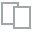
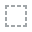
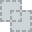
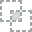
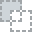
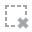
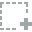
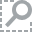
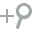
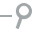
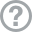
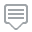
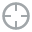
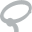
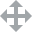
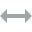
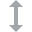
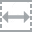
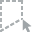
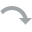
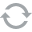
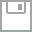
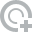
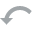
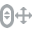
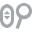
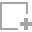
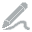
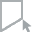
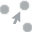
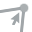
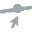

In [23]:
create_report(df)

###Relación entre Variable Target ('fumador') y el resto de las variables

In [24]:
variables_continuas=['cintura', 'sistolica', 'diastolica', 'glucosa', 'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina', 'creatinina', 'AST', 'ALT', 'Gtp']
variables_discretas=['edad', 'altura', 'peso', 'proteina_orina', 'vista_izq', 'vista_der', 'audicion_izq', 'audicion_der', 'caries_dental']

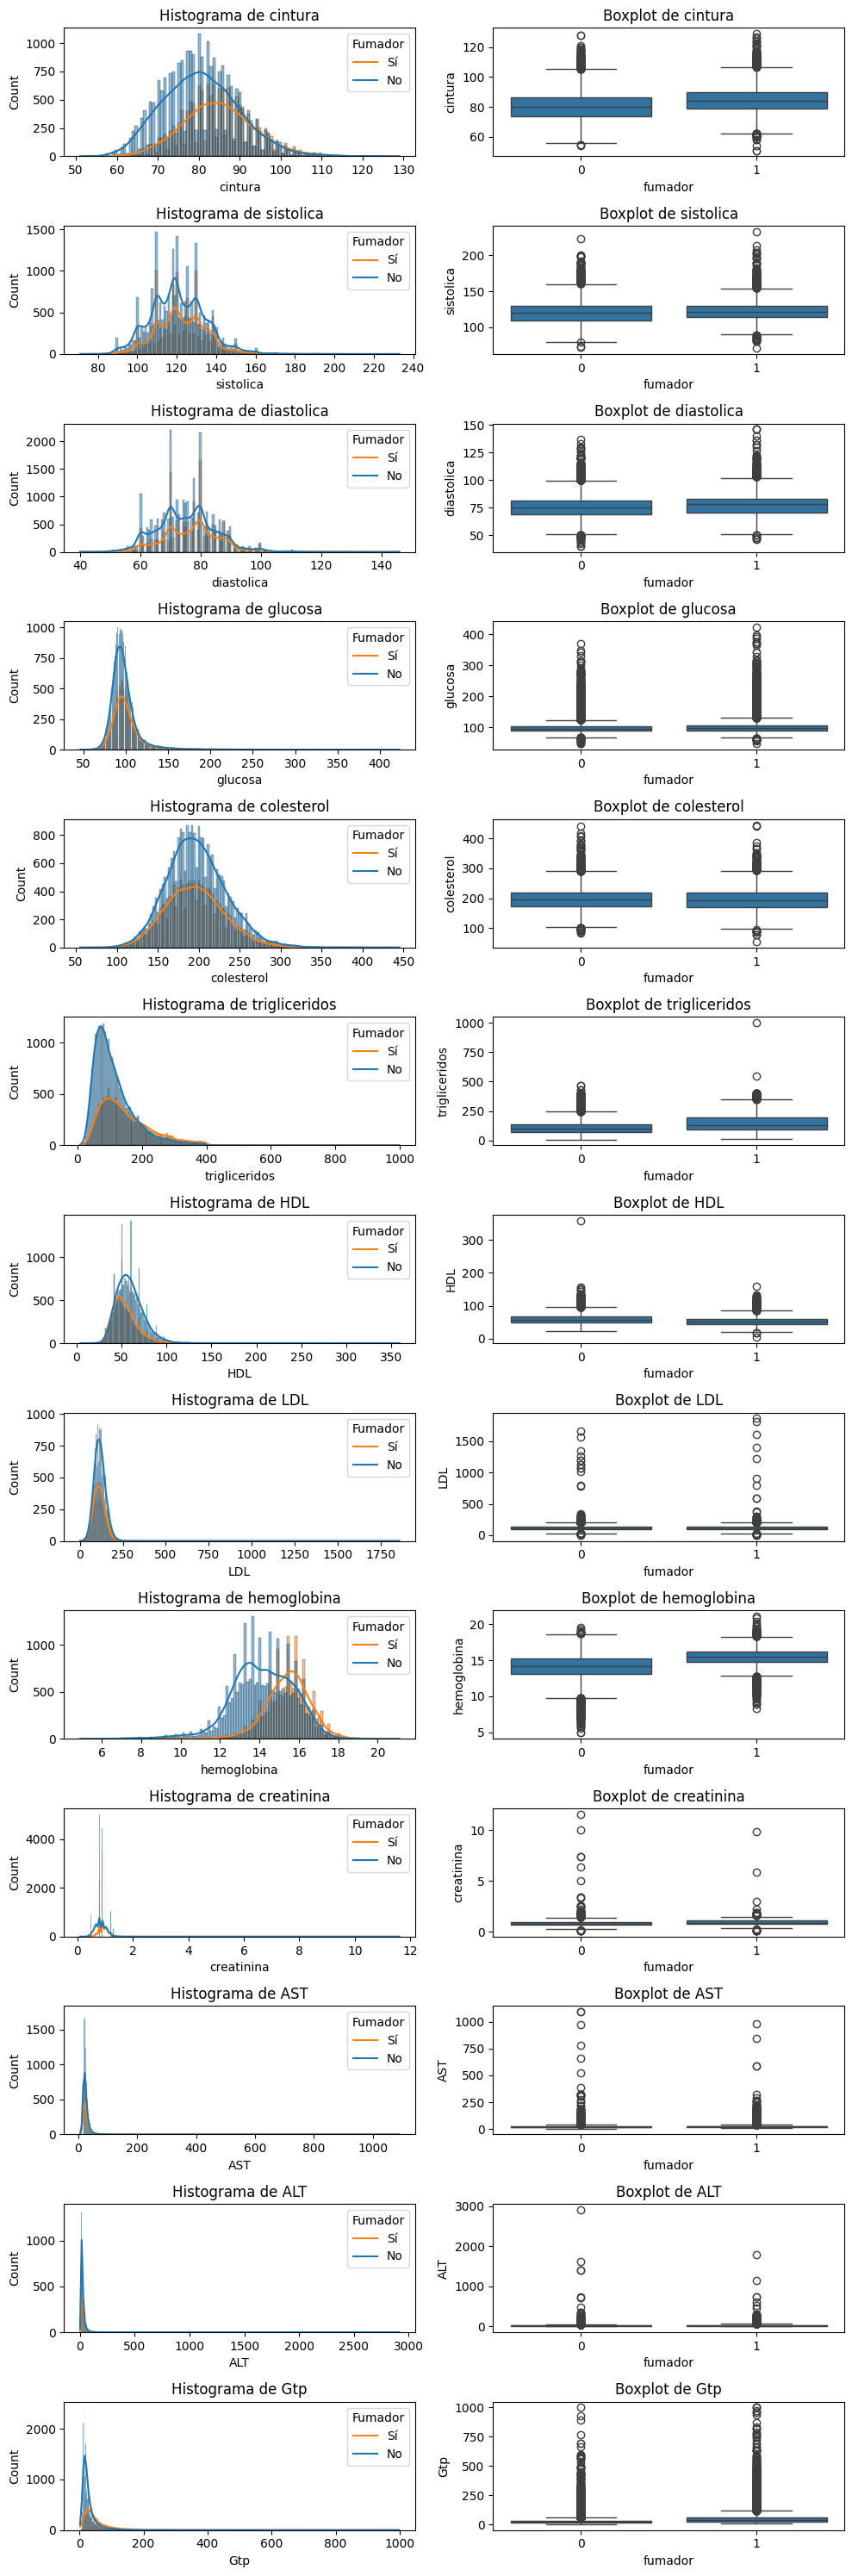

In [25]:
fig, axes = plt.subplots(len(variables_continuas), 2, figsize=(10, 30))

for i, var in enumerate(variables_continuas):
    sns.histplot(data=df, x=var, hue='fumador', ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histograma de {var}')
    axes[i, 0].legend(title='Fumador', labels=['Sí', 'No'])


    sns.boxplot(data=df, x='fumador', y=var, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot de {var}')

plt.tight_layout()

plt.show()

En estos gráficos no se evidencia diferencia entre fumadores y no fumadores, sólo en la frecuencia relativa, lo cual, tiene sentido, porque la variable fumador no está balanceada.

En el único caso en que se evidencia una diferencia es en la relación con la hemoglobina, en la que hablaré en las conclusiones.

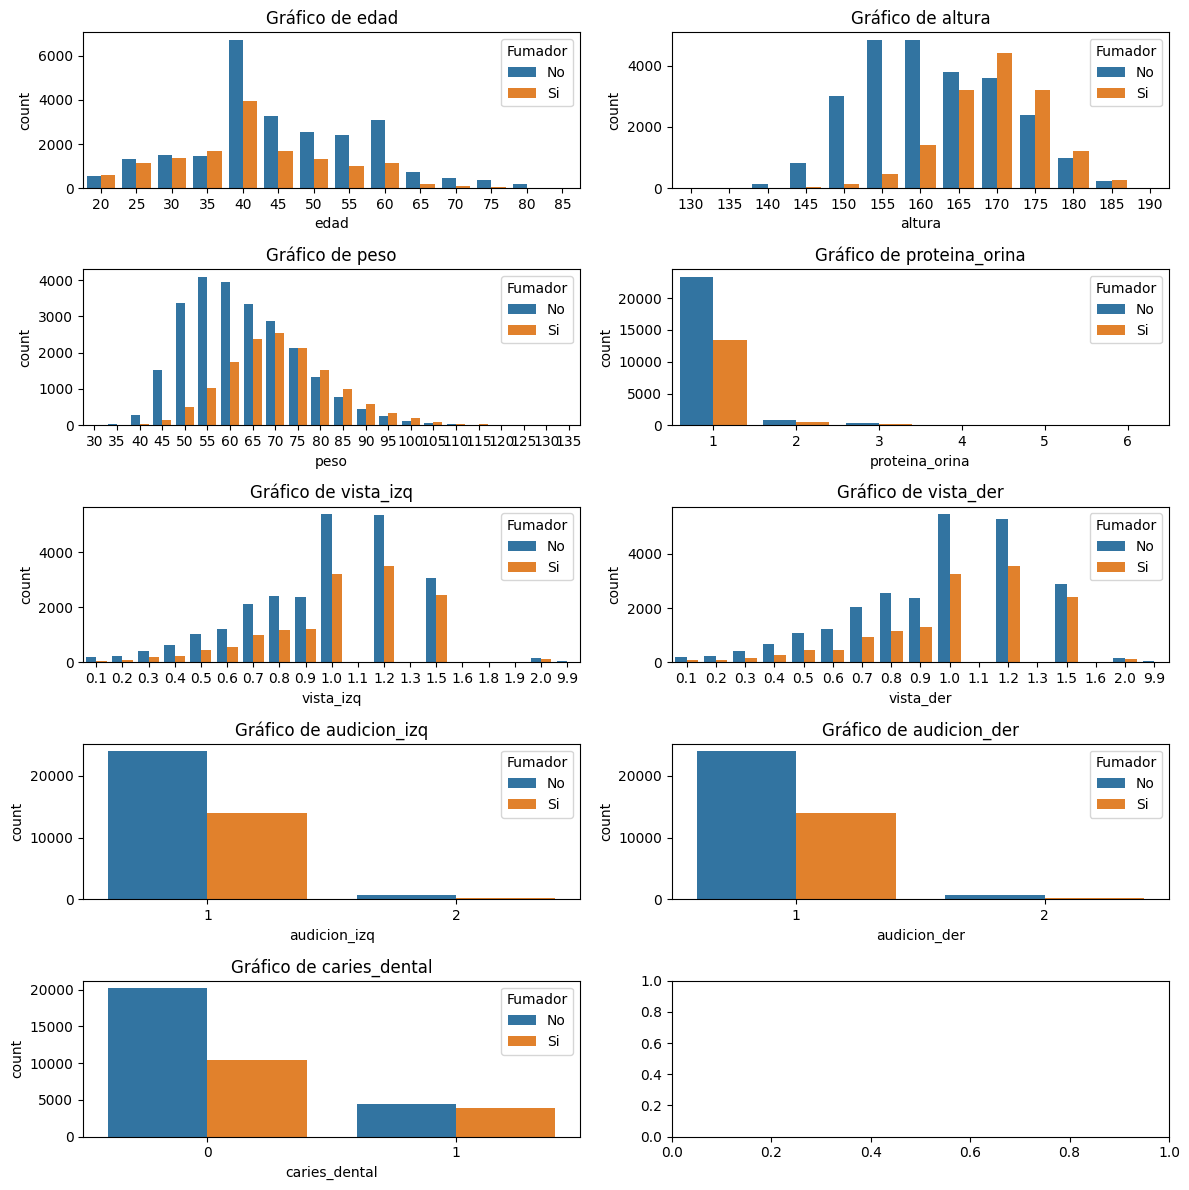

In [26]:
fig, axes = plt.subplots(5, 2, figsize=(12, 12))

for i, var in enumerate(variables_discretas):
    row, col = divmod(i, 2)
    sns.countplot(data=df, x=var, hue='fumador', ax=axes[row, col])
    axes[row, col].set_title(f'Gráfico de {var}')
    axes[row, col].legend(title='Fumador', labels=['No', 'Si'])



plt.tight_layout()

plt.show()

Con las variables discretas sucede lo mismo que con las continuas, hay una disminución de la frecuencia relativa, pero maneniendo la forma de la distribución; a excepción de la edad y la altura.

##Conclusiones antes de realizar modelos de predicción

La unica relación directa entre ser fumador y otra variable que he encontrado antes de realizar un modelo predictivo es con la hemoglobina. Parece ser que en el caso de los fumadores tienden a tener la hemoglobina desde los valores normales hacia valores superiores; a diferencia de los no fumadores, donde los valores apenas van hacia arriba y la mayoria de los valores fuera de los normales son menores. Aún así, es dificil poder determinar solo con valores de hemoglobina, si el paciente es fumador o no.

Algo parecido sucede con la altura y el peso, que parecen estar relacionadas con la variable target 'fumador'. Al parecer las personas fumadoras tienden a ser mas altas y tener un mayor peso. Como sucede con la hemoglobina, si alguien dice que tiene una cierta altura y peso no se podría decir si es fumadora o no.

Este dataset no tiene discriminado los datos entre hombres y mujeres, por lo que, al ser registros biológicos, es muy importante esta diferencia; ya que, los valores normales entre hombres y mujeres varían. Esto podría ser un problema mas adelante.

Existen muchas variables con outliers, pero no pueden ser eliminados porque puede ser que las enfermedades que provocan los outliers estén relacionados con el tabaquismo.



##Modelado

###Definir entrenamiento y test y escalado

In [27]:
# Classification task: Predicting 'fumador'
X= df.drop(columns=['fumador', 'audicion_izq', 'audicion_der'])
y= df['fumador']

In [28]:
#scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
#Metodo de validación Cruzada, voy a utilizar StratifiedFold
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_index, test_index = next(skf.split(X_scaled, y))

X_train_clf, X_test_clf = X.iloc[train_index], X.iloc[test_index]
y_train_clf, y_test_clf = y.iloc[train_index], y.iloc[test_index]


###Modelos

In [30]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_clf, y_train_clf)
y_pred_logreg = logreg.predict(X_test_clf)
print("Logistic Regression Accuracy:", accuracy_score(y_test_clf, y_pred_logreg))

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf = rf_clf.predict(X_test_clf)
print("Random Forest Accuracy:", accuracy_score(y_test_clf, y_pred_rf))

# SVC
svc = SVC()
svc.fit(X_train_clf, y_train_clf)
y_pred_svc = svc.predict(X_test_clf)
print("SVC Accuracy:", accuracy_score(y_test_clf, y_pred_svc))

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_clf, y_train_clf)
y_pred_gb = gb_clf.predict(X_test_clf)
print("Gradient Boosting Accuracy:", accuracy_score(y_test_clf, y_pred_gb))

# Classification Report for each model
print("Classification Report for Logistic Regression:")
print(classification_report(y_test_clf, y_pred_logreg))
print("Classification Report for Random Forest:")
print(classification_report(y_test_clf, y_pred_rf))
print("Classification Report for SVC:")
print(classification_report(y_test_clf, y_pred_svc))
print("Classification Report for Gradient Boosting:")
print(classification_report(y_test_clf, y_pred_gb))


Logistic Regression Accuracy: 0.7191227395151981
Random Forest Accuracy: 0.8110811850711812
SVC Accuracy: 0.7336154931383866
Gradient Boosting Accuracy: 0.7561882775426446
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      4933
           1       0.64      0.53      0.58      2864

    accuracy                           0.72      7797
   macro avg       0.70      0.68      0.68      7797
weighted avg       0.71      0.72      0.71      7797

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4933
           1       0.75      0.72      0.74      2864

    accuracy                           0.81      7797
   macro avg       0.80      0.79      0.79      7797
weighted avg       0.81      0.81      0.81      7797

Classification Report for SVC:
              precision    recall  f1-score   support



###Creación de Modelo Base


In [31]:
class BaseModel:
    """
    Clase base para modelos de clasificación.
    """
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.models = {}
        self.best_model = None
        self.model_scores = {}

    def save_model(self, filename):
        """Guarda un modelo en disco"""
        if self.best_model:
            with open(filename, 'wb') as f:
                pickle.dump(self.best_model, f)
            print(f"Modelo guardado como {filename}")

    @staticmethod
    def load_model(filename):
        """Carga un modelo desde disco"""
        with open(filename, 'rb') as f:
            return pickle.load(f)
    def save_best_model(self, filepath, save_scaler=True, model_info=True):
        """
        Guarda el mejor modelo junto con información relevante y el scaler si existe.

        Parameters:
        -----------
        filepath : str
            Ruta base donde se guardará el modelo (sin extensión)
        save_scaler : bool, default=True
            Si es True, guarda el scaler junto con el modelo (si existe)
        model_info : bool, default=True
            Si es True, guarda un archivo JSON con información sobre el modelo

        Returns:
        --------
        dict
            Diccionario con las rutas de los archivos guardados
        """
        import os
        import joblib
        import json
        from datetime import datetime

        saved_files = {}

        try:
            # Crear el directorio si no existe
            os.makedirs(os.path.dirname(filepath), exist_ok=True)

            # Guardar el modelo
            model_path = f"{filepath}_model.joblib"
            joblib.dump(self.best_model, model_path)
            saved_files['model'] = model_path

            # Guardar el scaler si existe y se solicita
            if save_scaler and hasattr(self, 'scaler'):
                scaler_path = f"{filepath}_scaler.joblib"
                joblib.dump(self.scaler, scaler_path)
                saved_files['scaler'] = scaler_path

            # Guardar información del modelo
            if model_info:
                info = {
                    'model_type': type(self.best_model).__name__,
                    'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                    'feature_names': list(self.X_train.columns) if hasattr(self.X_train, 'columns') else None,
                    'parameters': self.best_model.get_params(),
                }

                # Agregar métricas específicas según el modelo
                best_scores = max(self.model_scores.items(), key=lambda x: x[1]['accuracy'])
                info['metrics'] = {
                        'accuracy': best_scores[1]['accuracy'],
                        'classification_report': best_scores[1]['classification_report']
                    }

                info_path = f"{filepath}_info.json"
                with open(info_path, 'w', encoding='utf-8') as f:
                    json.dump(info, f, indent=4)
                saved_files['info'] = info_path

            print(f"Modelo guardado exitosamente en: {model_path}")
            return saved_files

        except Exception as e:
            print(f"Error al guardar el modelo: {str(e)}")
            return None

In [32]:
class ClassificationModel(BaseModel):
    def __init__(self, X_train, y_train, X_test, y_test):
        super().__init__(X_train, y_train, X_test, y_test)

    def train_models(self, custom_models=None):
        """Entrena múltiples modelos de clasificación con búsqueda de hiperparámetros"""
        default_classifiers = {
            'RandomForest': (RandomForestClassifier(), {
                'n_estimators': [50, 100, 200],
                'max_depth': [10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }),
            'LogisticRegression': (LogisticRegression(max_iter=1000), {
                'C': [0.001, 0.01, 0.1, 1, 10],
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear', 'saga']
            }),
            'GradientBoosting': (GradientBoostingClassifier(), {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.3],
                'max_depth': [3, 5, 7]
            }),
            'SVC': (SVC(), {
                'C': [0.1, 1, 10],
                'kernel': ['rbf', 'linear'],
                'gamma': ['scale', 'auto']
            }),
            'KNN': (KNeighborsClassifier(), {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan']
            })
        }

        # Permite agregar modelos personalizados
        if custom_models:
            default_classifiers.update(custom_models)

        for name, (clf, param_grid) in default_classifiers.items():
            try:
                print(f"\nEntrenando {name}...")
                search = HalvingGridSearchCV(
                    clf,
                    param_grid,
                    factor=3,
                    cv=5,
                    scoring='accuracy',
                    n_jobs=-1
                )
                search.fit(self.X_train, self.y_train)
                self.models[name] = search.best_estimator_
                print(f"{name} - Mejores parámetros: {search.best_params_}")
                print(f"{name} - Mejor score CV: {search.best_score_:.4f}")
            except Exception as e:
                print(f"Error entrenando {name}: {str(e)}")

    def evaluate_models(self):
        """Evalúa todos los modelos entrenados y guarda sus métricas"""
        best_score = 0
        evaluation_results = []

        for name, model in self.models.items():
            try:
                y_pred = model.predict(self.X_test)
                accuracy = accuracy_score(self.y_test, y_pred)
                self.model_scores[name] = {
                    'accuracy': accuracy,
                    'classification_report': classification_report(self.y_test, y_pred),
                    'confusion_matrix': confusion_matrix(self.y_test, y_pred)
                }

                evaluation_results.append({
                    'Model': name,
                    'Accuracy': accuracy
                })

                if accuracy > best_score:
                    self.best_model = model
                    best_score = accuracy

                print(f"\nResultados para {name}:")
                print(f"Accuracy: {accuracy:.4f}")
                print("Classification Report:")
                print(self.model_scores[name]['classification_report'])

            except Exception as e:
                print(f"Error evaluando {name}: {str(e)}")

        # Crear DataFrame con resultados
        results_df = pd.DataFrame(evaluation_results)
        print("\nResumen de resultados:")
        print(results_df.sort_values('Accuracy', ascending=False))
        print(f"\nMejor modelo: {type(self.best_model).__name__} con accuracy: {best_score:.4f}")
        return results_df




In [33]:
class ModelPerformanceVisualizer:
    def __init__(self, classification_model=None, regression_model=None):
        self.classification_model = classification_model


    def plot_classification_results(self):
        """Visualiza los resultados de los modelos de clasificación"""
        if not self.classification_model or not self.classification_model.model_scores:
            print("No hay resultados de clasificación para visualizar")
            return

        # Gráfico de barras de accuracy
        plt.figure(figsize=(12, 6))
        accuracies = {name: scores['accuracy']
                     for name, scores in self.classification_model.model_scores.items()}
        plt.bar(accuracies.keys(), accuracies.values())
        plt.title('Comparación de Accuracy entre Modelos')
        plt.xticks(rotation=45)
        plt.ylabel('Accuracy')
        plt.tight_layout()
        plt.show()

        # Matriz de confusión del mejor modelo
        best_model_name = max(accuracies, key=accuracies.get)
        cm = self.classification_model.model_scores[best_model_name]['confusion_matrix']
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Matriz de Confusión - {best_model_name}')
        plt.ylabel('Real')
        plt.xlabel('Predicho')
        plt.tight_layout()
        plt.show()


    def generate_summary_report(self):
        """Genera un reporte resumen de todos los modelos evaluados"""
        report = []

        if self.classification_model and self.classification_model.model_scores:
            report.append("=== Resultados de Clasificación ===")
            # Ordenar modelos por accuracy
            sorted_models = sorted(
                self.classification_model.model_scores.items(),
                key=lambda x: x[1]['accuracy'],
                reverse=True
            )

            for name, scores in sorted_models:
                report.append(f"\nModelo: {name}")
                report.append(f"Accuracy: {scores['accuracy']:.4f}")
                report.append("\nReporte de Clasificación:")
                report.append(scores['classification_report'])

        return "\n".join(report)

    def save_visualizations(self, output_dir='model_visualizations'):
        """Guarda todas las visualizaciones en un directorio específico"""
        import os

        # Crear directorio si no existe
        os.makedirs(output_dir, exist_ok=True)

        if self.classification_model and self.classification_model.model_scores:
            # Gráfico de accuracies
            plt.figure(figsize=(12, 6))
            accuracies = {name: scores['accuracy']
                         for name, scores in self.classification_model.model_scores.items()}
            plt.bar(accuracies.keys(), accuracies.values())
            plt.title('Comparación de Accuracy entre Modelos')
            plt.xticks(rotation=45)
            plt.ylabel('Accuracy')
            plt.tight_layout()
            plt.savefig(os.path.join(output_dir, 'classification_accuracy_comparison.png'))
            plt.close()

            # Matriz de confusión del mejor modelo
            best_model_name = max(accuracies, key=accuracies.get)
            cm = self.classification_model.model_scores[best_model_name]['confusion_matrix']
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f'Matriz de Confusión - {best_model_name}')
            plt.ylabel('Real')
            plt.xlabel('Predicho')
            plt.tight_layout()
            plt.savefig(os.path.join(output_dir, 'best_model_confusion_matrix.png'))
            plt.close()



###Entrenar modelos

In [34]:
#Metodo de validación Cruzada, voy a utilizar StratifiedFold ya que la columna objetivo esta desbalanceada.
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_index, test_index = next(skf.split(X_scaled, y))

X_train_clf, X_test_clf = X.iloc[train_index], X.iloc[test_index]
y_train_clf, y_test_clf = y.iloc[train_index], y.iloc[test_index]

In [ ]:
# Entrenar modelos de clasificación
clf = ClassificationModel(X_train_clf, y_train_clf, X_test_clf, y_test_clf)
clf.train_models()
clf_results = clf.evaluate_models()

# Visualizar resultados
visualizer = ModelPerformanceVisualizer(classification_model=clf)
visualizer.plot_classification_results()
visualizer.save_visualizations()

# Generar reporte
print(visualizer.generate_summary_report())



Entrenando RandomForest...
RandomForest - Mejores parámetros: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 50}
RandomForest - Mejor score CV: 0.7814

Entrenando LogisticRegression...
LogisticRegression - Mejores parámetros: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression - Mejor score CV: 0.7208

Entrenando GradientBoosting...
GradientBoosting - Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
GradientBoosting - Mejor score CV: 0.7585

Entrenando SVC...


##Conclusiones:

El modelo de predicción con mejores métricas, para predecir si un paciente es fumador, es:

Modelo sin técnica de optimización de hiperparámetros: Random Forest con un Accuracy de: 0.8110811850711812

Modelo con técnica de optimización de hiperparámetros: ******** con un Accuracy de: **********

# Bibliografía

###### Dataset: https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction/data

###### (1):https://pnsd.sanidad.gob.es/ciudadanos/informacion/tabaco/menuTabaco/riesgos.htm#:~:text=C%C3%A1ncer%20de%20pulm%C3%B3n.,trombosis%2C%20hemorragias%20o%20embolias).

###### (2):https://www.msdmanuals.com/es/professional/recursos/valores-normales-de-laboratorio/pruebas-de-sangre-valores-normales

###### (3):https://www.msdmanuals.com/es/professional/recursos/valores-normales-de-laboratorio/an%C3%A1lisis-de-orina-valores-normales

###### (4):https://www.nia.nih.gov/espanol/presion-arterial-alta/presion-arterial-alta-personas-mayores#:~:text=La%20presi%C3%B3n%20arterial%20normal%2C%20en,diast%C3%B3lica%20de%20menos%20de%2080.